In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
width=500
height=400

canvas=np.zeros((width,height))

In [42]:
x_grid=np.arange(0,100,1)
y_grid=np.arange(0,100,1)

In [21]:
xx,yy=np.meshgrid(x_grid,y_grid)


array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

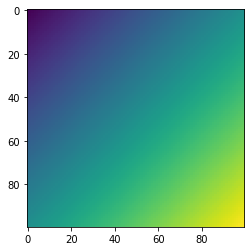

In [22]:
plt.imshow(xx+yy)

In [28]:
spot_x=70
spot_y=50
sigma=1


In [29]:
c1=np.sqrt(2*np.pi)
spot_distrbution=(1/sigma*c1)*np.exp(-0.5*((np.sqrt((xx-spot_x)**2+(yy-spot_y)**2))/sigma)**2)

In [24]:
np.pi

3.141592653589793

In [26]:
np.sqrt((xx-spot_x)**2+(yy-spot_y)**2)

array([[86.02325267, 85.21150157, 84.40379138, ..., 56.82429058,
        57.30619513, 57.80138407],
       [85.44588931, 84.62860037, 83.81527307, ..., 55.94640292,
        56.43580424, 56.93856338],
       [84.8763807 , 84.05355436, 83.23460819, ..., 55.07267925,
        55.56977596, 56.08029957],
       ...,
       [84.31488599, 83.48652586, 82.66196223, ..., 54.20332093,
        54.70831747, 55.22680509],
       [84.8763807 , 84.05355436, 83.23460819, ..., 55.07267925,
        55.56977596, 56.08029957],
       [85.44588931, 84.62860037, 83.81527307, ..., 55.94640292,
        56.43580424, 56.93856338]])

In [64]:
s=np.stack((yy-spot_y,xx-spot_x),axis=-1)


array([0, 0])

In [66]:
sigma=10

In [67]:
dist=np.linalg.norm(np.stack((xx-spot_x,yy-spot_y),axis=-1),axis=-1)
spot_distrbution=np.exp((-(dist**2)/sigma))

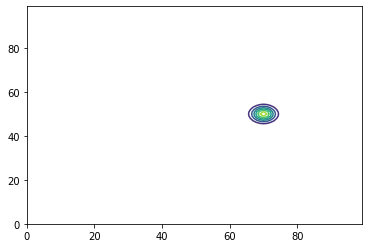

In [68]:
plt.contour(x_grid,y_grid,spot_distrbution)

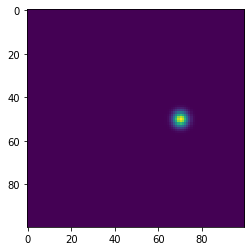

In [69]:
plt.imshow(spot_distrbution)

In [95]:
spots=[(10,10),(10,11),(10,50),(80,80)]

In [98]:
class gaussian_spots():
    """This creates a tensor of gaussian spots, dimensions are given via img_size and spot_size corresonds to sigma squared"""
    def __init__(self,spot_size,img_size):
        self.x_grid=np.arange(0,img_size[0],1)
        self.y_grid=np.arange(0,img_size[1],1)
        self.xx,self.yy=np.meshgrid(x_grid,y_grid)
        self.spot_size=spot_size
        
    def __call__(self,spots):
        total_dist=None
        for spot in spots:
            spot_dist=np.linalg.norm(np.stack((self.xx-spot[0],self.yy-spot[1]),axis=-1),axis=-1)
            if total_dist is None:
                total_dist=spot_dist
            total_dist=np.minimum(spot_dist,total_dist)
            #an optimization. minimum of the distances instead of maximum of the gaussians as in the paper

        return np.exp((-(total_dist**2)/self.spot_size))

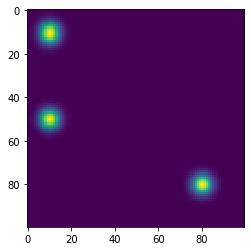

In [99]:
spot_drawer=gaussian_spots(20,(300,300))
plt.imshow(spot_drawer(spots))

In [101]:
spot_drawer(spots).sum()

196.3382160203387

In [106]:
j=np.array([(10,10),(50,50)])
sigmaj=5

In [104]:
grid=np.stack((xx,yy),axis=-1)

In [110]:
v1=j[1]-j[0]
l=np.linalg.norm(v1)
v=v1/l

In [111]:
l,v

(56.568542494923804, array([0.70710678, 0.70710678]))

In [145]:
pts=grid-j[0]
d=np.dot(pts,v)


In [138]:
vn=np.array((-v[1],v[0]))

In [147]:
np.abs((np.dot(pts,vn)))<sigmaj

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

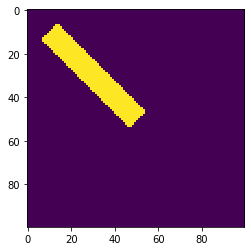

In [148]:
limit=(0<=d) & (d<=l) & (np.abs((np.dot(pts,vn)))<=sigmaj)
plt.imshow(limit)

In [152]:
canvas=np.zeros((100,100,2))

In [153]:
canvas[limit]=v

In [156]:
canvas[40,20]

array([0., 0.])

In [ ]:
class Paf_generator():
    """This creates a tensor of gaussian spots, dimensions are given via img_size and spot_size corresonds to sigma squared"""
    def __init__(self,spot_size,img_size):
        self.x_grid=np.arange(0,img_size[0],1)
        self.y_grid=np.arange(0,img_size[1],1)
        self.xx,self.yy=np.meshgrid(x_grid,y_grid)
        self.spot_size=spot_size
        
    def __call__(self,spots):
        total_dist=None
        for spot in spots:
            spot_dist=np.linalg.norm(np.stack((self.xx-spot[0],self.yy-spot[1]),axis=-1),axis=-1)
            if total_dist is None:
                total_dist=spot_dist
            total_dist=np.minimum(spot_dist,total_dist)
            #an optimization. minimum of the distances instead of maximum of the gaussians as in the paper

        return np.exp((-(total_dist**2)/self.spot_size))